Import Libraries

In [980]:
# Import all libraries used including the libraries that were used to determine the best model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import glob
from datetime import datetime
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import sklearn
import openpyxl
import pickle

In [981]:
#set working directory to where data is stored
os.chdir(r"C:\Users\belbi\OneDrive\Documents\GCU\Capstone\Data\All Data")

In [982]:
#get filenames of all datafiles
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['redfin_2022-11-06-15-36-04.csv',
 'redfin_2022-11-06-15-54-57.csv',
 'redfin_2022-11-06-15-55-50.csv',
 'redfin_2022-11-06-15-56-31.csv',
 'redfin_2022-11-06-15-57-35.csv',
 'redfin_2022-11-06-15-58-16.csv',
 'redfin_2022-11-06-15-59-07.csv',
 'redfin_2022-11-06-15-59-57.csv',
 'redfin_2022-11-06-16-00-40.csv',
 'redfin_2022-11-06-16-01-03.csv',
 'redfin_2022-11-06-16-02-21.csv',
 'redfin_2022-11-06-16-04-07.csv',
 'redfin_2022-11-06-16-04-47.csv',
 'redfin_2022-11-06-16-07-10.csv',
 'redfin_2022-11-06-16-07-54.csv',
 'redfin_2022-11-06-16-08-30.csv',
 'redfin_2022-11-06-16-08-59.csv',
 'redfin_2022-11-06-16-09-39.csv',
 'redfin_2022-11-06-16-09-57.csv',
 'redfin_2022-11-06-16-10-12.csv',
 'redfin_2022-11-06-16-10-30.csv',
 'redfin_2022-11-06-16-11-00.csv',
 'redfin_2022-11-06-16-11-16.csv',
 'redfin_2022-11-06-16-11-32.csv',
 'redfin_2022-11-06-16-12-13.csv',
 'redfin_2022-11-06-16-12-24.csv',
 'redfin_2022-11-06-16-12-50.csv',
 'redfin_2022-11-06-16-13-03.csv',
 'redfin_2022-11-06-

In [983]:
#build the dataframe by appending each file to the dataframe
df_append = pd.DataFrame()
for file in csv_files:
    df_temp = pd.read_csv(file)
    df_append = df_append.append(df_temp, ignore_index = True)
df_append

C:\Users\belbi\AppData\Local\Temp\ipykernel_6664\1639621125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index = True)
C:\Users\belbi\AppData\Local\Temp\ipykernel_6664\1639621125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index = True)
C:\Users\belbi\AppData\Local\Temp\ipykernel_6664\1639621125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index = True)
C:\Users\belbi\AppData\Local\Temp\ipykernel_6664\1639621125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_appe

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL
0,PAST SALE,NaN,Single Family Residential,1846 E Willetta St,Phoenix,AZ,85006.0,210000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1846-E-Wille...,NaN,NaN,N,Y,33.463985,-112.041373,Y
1,PAST SALE,NaN,Single Family Residential,1515 E Brill St,Phoenix,AZ,85006.0,360000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1515-E-Brill...,NaN,NaN,N,Y,33.464534,-112.049151,Y
2,PAST SALE,NaN,Single Family Residential,1632 E Granada Rd,Phoenix,AZ,85006.0,245000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1632-E-Grana...,NaN,NaN,N,Y,33.468711,-112.046170,Y
3,PAST SALE,September-16-2022,Single Family Residential,1113 W PORTLAND St,Phoenix,AZ,85007.0,780000.0,4.0,2.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1113-W-Portl...,ARMLS,6425854.0,N,Y,33.459457,-112.087766,Y
4,PAST SALE,NaN,Single Family Residential,946 W Cocopah St,Phoenix,AZ,85007.0,258000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/946-W-Cocopa...,NaN,NaN,N,Y,33.432397,-112.086411,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14081,PAST SALE,November-12-2021,Single Family Residential,3543 W STEINBECK Ct,Anthem,AZ,85086.0,460000.0,4.0,2.5,...,NaN,NaN,https://www.redfin.com/AZ/Anthem/3543-W-Steinb...,ARMLS,6281367.0,N,Y,33.854970,-112.136850,N
14082,PAST SALE,November-12-2021,Single Family Residential,34702 N 25TH Ln,Phoenix,AZ,85086.0,498000.0,4.0,3.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/34702-N-25th...,ARMLS,6294845.0,N,Y,33.798999,-112.114774,N
14083,PAST SALE,November-12-2021,Single Family Residential,3728 W MEDINAH Way,Anthem,AZ,85086.0,473000.0,4.0,2.0,...,NaN,NaN,https://www.redfin.com/AZ/Anthem/3728-W-Medina...,ARMLS,6303296.0,N,Y,33.860097,-112.140553,N
14084,PAST SALE,November-10-2021,Single Family Residential,4642 W ROLLING ROCK Dr,Phoenix,AZ,85086.0,469000.0,4.0,2.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/4642-W-Rolli...,ARMLS,6301292.0,N,Y,33.870460,-112.160230,N


In [984]:
df = df_append

In [985]:
#explore the first five rows of data
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL
0,PAST SALE,NaN,Single Family Residential,1846 E Willetta St,Phoenix,AZ,85006.0,210000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1846-E-Wille...,NaN,NaN,N,Y,33.463985,-112.041373,Y
1,PAST SALE,NaN,Single Family Residential,1515 E Brill St,Phoenix,AZ,85006.0,360000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1515-E-Brill...,NaN,NaN,N,Y,33.464534,-112.049151,Y
2,PAST SALE,NaN,Single Family Residential,1632 E Granada Rd,Phoenix,AZ,85006.0,245000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1632-E-Grana...,NaN,NaN,N,Y,33.468711,-112.046170,Y
3,PAST SALE,September-16-2022,Single Family Residential,1113 W PORTLAND St,Phoenix,AZ,85007.0,780000.0,4.0,2.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1113-W-Portl...,ARMLS,6425854.0,N,Y,33.459457,-112.087766,Y
4,PAST SALE,NaN,Single Family Residential,946 W Cocopah St,Phoenix,AZ,85007.0,258000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/946-W-Cocopa...,NaN,NaN,N,Y,33.432397,-112.086411,Y


In [986]:
#view statistics on all columns in the data
df.describe(include='all')

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL
count,14086,11310,14086,14073,14073,14086,14073.000000,1.407000e+04,11372.000000,14014.000000,...,0.0,0.0,14086,11326,1.131000e+04,14086,14086,14086.000000,14086.000000,14086
unique,1,296,7,9841,8,1,NaN,NaN,NaN,NaN,...,NaN,NaN,9856,3,NaN,1,1,NaN,NaN,3
top,PAST SALE,February-28-2022,Single Family Residential,3329 E Palm Ln,Phoenix,AZ,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/3329-E-Palm-...,ARMLS,NaN,N,Y,NaN,NaN,N
freq,14086,121,14029,9,13105,14086,NaN,NaN,NaN,NaN,...,NaN,NaN,9,11324,NaN,14086,14086,NaN,NaN,10510
mean,NaN,NaN,NaN,NaN,NaN,NaN,85047.239324,3.803371e+05,3.232501,2.006130,...,NaN,NaN,NaN,NaN,6.369872e+06,NaN,NaN,33.522791,-112.114185,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,71.250392,7.889273e+04,0.694417,1.562289,...,NaN,NaN,NaN,NaN,1.647732e+05,NaN,NaN,0.103886,0.078065,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,85003.000000,4.500000e+04,0.000000,0.750000,...,NaN,NaN,NaN,NaN,1.044944e+06,NaN,NaN,33.291952,-112.324952,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,85019.000000,3.380000e+05,3.000000,2.000000,...,NaN,NaN,NaN,NaN,6.328852e+06,NaN,NaN,33.464945,-112.152255,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,85032.000000,3.870000e+05,3.000000,2.000000,...,NaN,NaN,NaN,NaN,6.364636e+06,NaN,NaN,33.503079,-112.118221,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,85042.000000,4.365508e+05,4.000000,2.000000,...,NaN,NaN,NaN,NaN,6.409132e+06,NaN,NaN,33.601263,-112.053669,NaN


In [987]:
#look for any null values contained in columns
df.isnull().sum()


SALE TYPE                                                                                          0
SOLD DATE                                                                                       2776
PROPERTY TYPE                                                                                      0
ADDRESS                                                                                           13
CITY                                                                                              13
STATE OR PROVINCE                                                                                  0
ZIP OR POSTAL CODE                                                                                13
PRICE                                                                                             16
BEDS                                                                                            2714
BATHS                                                                                      

In [988]:
#view the data types for each of the columns in teh data
df.dtypes

SALE TYPE                                                                                       object
SOLD DATE                                                                                       object
PROPERTY TYPE                                                                                   object
ADDRESS                                                                                         object
CITY                                                                                            object
STATE OR PROVINCE                                                                               object
ZIP OR POSTAL CODE                                                                             float64
PRICE                                                                                          float64
BEDS                                                                                           float64
BATHS                                                                    

In [989]:
#convert the sold date to a date
date_string = df['SOLD DATE']
df['SOLDDATE'] = pd.to_datetime(date_string)

In [990]:
#removing data without MLS# as these most likely represent private sales
df = df.dropna(subset=['MLS#'],axis=0)

In [991]:
#after removing the data without MLS# determine how many columns still contain null values
df.isnull().sum()

SALE TYPE                                                                                          0
SOLD DATE                                                                                          0
PROPERTY TYPE                                                                                      0
ADDRESS                                                                                            0
CITY                                                                                               0
STATE OR PROVINCE                                                                                  0
ZIP OR POSTAL CODE                                                                                 0
PRICE                                                                                              0
BEDS                                                                                               0
BATHS                                                                                      

In [992]:
#remove the rows of data where the bed, baths or lotsize data is missing
df = df.dropna(subset=['BEDS'],axis=0)
df = df.dropna(subset=['BATHS'],axis=0)
df = df.dropna(subset=['LOT SIZE'],axis=0)

In [993]:
#build an HOA data object based on whether there is an amount in the HOA/month column
df['HOA'] = np.where(df['HOA/MONTH'] > 0 ,1, 0)

In [994]:
#convert the Pool Y/N data to 1/0 values based on Y =1 and all else is 0
df['POOL'] = np.where(df['POOL'] == 'Y', 1,0)

In [995]:
#view the dataframe after making the changes above
df

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL,SOLDDATE,HOA
3,PAST SALE,September-16-2022,Single Family Residential,1113 W PORTLAND St,Phoenix,AZ,85007.0,780000.0,4.0,2.0,...,https://www.redfin.com/AZ/Phoenix/1113-W-Portl...,ARMLS,6425854.0,N,Y,33.459457,-112.087766,1,2022-09-16,0
5,PAST SALE,September-9-2022,Single Family Residential,1425 E PORTLAND St,Phoenix,AZ,85006.0,385000.0,2.0,1.0,...,https://www.redfin.com/AZ/Phoenix/1425-E-Portl...,ARMLS,6454396.0,N,Y,33.460299,-112.050874,1,2022-09-09,0
6,PAST SALE,August-8-2022,Single Family Residential,1501 W Willetta St,Phoenix,AZ,85007.0,649999.0,3.0,3.0,...,https://www.redfin.com/AZ/Phoenix/1501-W-Wille...,ARMLS,6388381.0,N,Y,33.463507,-112.091487,1,2022-08-08,0
8,PAST SALE,August-29-2022,Single Family Residential,1515 W YAVAPAI St W,Phoenix,AZ,85007.0,350000.0,4.0,2.0,...,https://www.redfin.com/AZ/Phoenix/1515-W-Yavap...,ARMLS,6433870.0,N,Y,33.435667,-112.092093,1,2022-08-29,0
9,PAST SALE,September-30-2022,Single Family Residential,810 S 3RD Ave,Phoenix,AZ,85003.0,614000.0,4.0,3.0,...,https://www.redfin.com/AZ/Phoenix/810-S-3rd-Av...,ARMLS,6388579.0,N,Y,33.439645,-112.077468,1,2022-09-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14081,PAST SALE,November-12-2021,Single Family Residential,3543 W STEINBECK Ct,Anthem,AZ,85086.0,460000.0,4.0,2.5,...,https://www.redfin.com/AZ/Anthem/3543-W-Steinb...,ARMLS,6281367.0,N,Y,33.854970,-112.136850,0,2021-11-12,1
14082,PAST SALE,November-12-2021,Single Family Residential,34702 N 25TH Ln,Phoenix,AZ,85086.0,498000.0,4.0,3.0,...,https://www.redfin.com/AZ/Phoenix/34702-N-25th...,ARMLS,6294845.0,N,Y,33.798999,-112.114774,0,2021-11-12,1
14083,PAST SALE,November-12-2021,Single Family Residential,3728 W MEDINAH Way,Anthem,AZ,85086.0,473000.0,4.0,2.0,...,https://www.redfin.com/AZ/Anthem/3728-W-Medina...,ARMLS,6303296.0,N,Y,33.860097,-112.140553,0,2021-11-12,1
14084,PAST SALE,November-10-2021,Single Family Residential,4642 W ROLLING ROCK Dr,Phoenix,AZ,85086.0,469000.0,4.0,2.0,...,https://www.redfin.com/AZ/Phoenix/4642-W-Rolli...,ARMLS,6301292.0,N,Y,33.870460,-112.160230,0,2021-11-10,1


In [996]:
# select the columns to be used in the model as well as the app for analysis
#rename long column names and remove spaces in column names
data = df[['SOLDDATE','ADDRESS','CITY','STATE OR PROVINCE','ZIP OR POSTAL CODE','PRICE','BEDS','BATHS','SQUARE FEET','LOT SIZE','YEAR BUILT','MLS#','POOL','HOA','LATITUDE','LONGITUDE']]
data = data.rename(columns = {'ZIP OR POSTAL CODE':'ZIPCODE'})
data = data.rename(columns = {'SQUARE FEET':'SQFT'})
data = data.rename(columns = {'LOT SIZE':'LOTSIZE'})
data = data.rename(columns = {'YEAR BUILT':'YEARBUILT'})

In [997]:
#limit the dataset to sold price of less than $500k
data = data[data.PRICE <500000]

In [998]:
#Remove zipcodes captured that are not Phoenix
data = data[data.ZIPCODE < 85099]


In [999]:
#Remove Duplicates and view shape of the data
data.duplicated().sum()
data.drop_duplicates
data.shape

(10476, 16)

In [1000]:
#Verify that there are no missing values in the new dataset
data.isnull().sum()

SOLDDATE             0
ADDRESS              0
CITY                 0
STATE OR PROVINCE    0
ZIPCODE              0
PRICE                0
BEDS                 0
BATHS                0
SQFT                 0
LOTSIZE              0
YEARBUILT            0
MLS#                 0
POOL                 0
HOA                  0
LATITUDE             0
LONGITUDE            0
dtype: int64

In [1001]:
#covert zipcode to category data for one hot encoding
data['ZIPCODE']=data['ZIPCODE'].astype('int64')
data['YEARBUILT']=data['YEARBUILT'].astype('int64')
data['SQFT']=data['SQFT'].astype('int64')
data['LOTSIZE']=data['LOTSIZE'].astype('int64')
data['BATH']=data['BEDS'].astype('int32')

#### Exploratory Data Analysis
Explore Price

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1dd635490>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1dd6359d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1dd6351c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1dd635f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1dd7521f0>],
 'means': []}

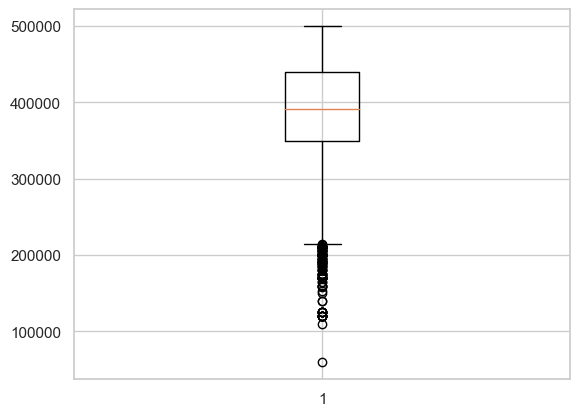

In [1002]:
#original view of price to determine outliers that need to be removed

plt.boxplot(data['PRICE'])


In [1003]:
#remove outliers less than 220,000
data = data[data.PRICE>220000]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1dd7a37f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1dd7a3d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1dd7a3550>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1dd7b12b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1dd7b1550>],
 'means': []}

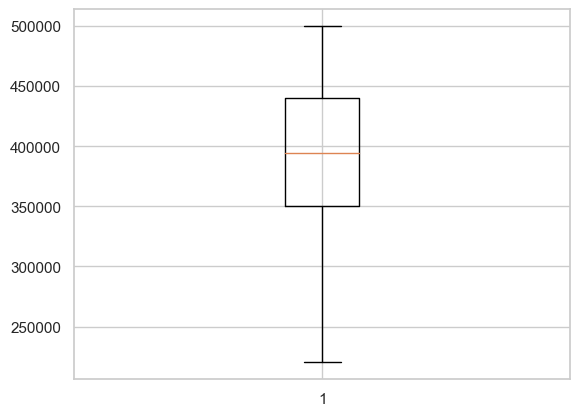

In [1004]:
#view after removing the outliers
plt.boxplot(data['PRICE'])

Compare house size to price

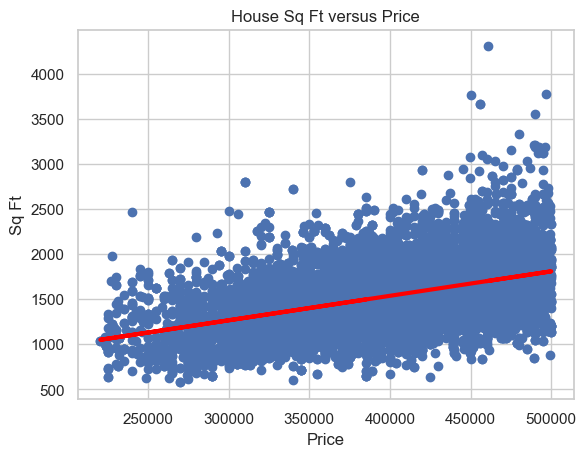

In [1005]:
x=data['PRICE']
y=data['SQFT']
plt.scatter(x,y)
plt.title('House Sq Ft versus Price')
plt.xlabel('Price')
plt.ylabel('Sq Ft')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

Compare number of bedrooms to price

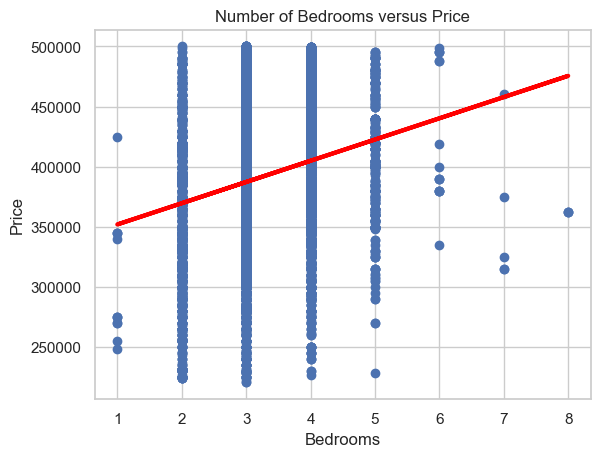

In [1006]:
y=data['PRICE']
x=data['BEDS']
plt.scatter(x,y)
plt.title('Number of Bedrooms versus Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

Histogram of number of Bedrooms

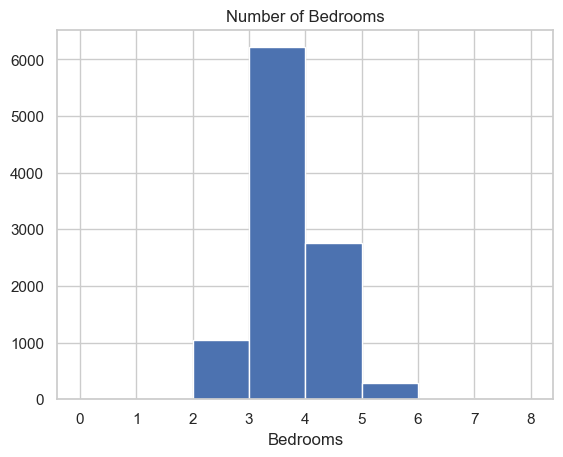

In [1007]:
plt.hist(data['BEDS'], bins= [0,1,2,3,4,5,6,7,8])
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1dde43be0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1dde53160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1dde43940>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1dde536a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1dde53940>],
 'means': []}

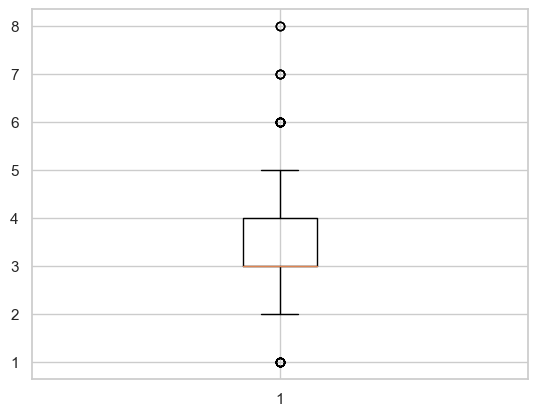

In [1008]:
#View the distribution of the number of bedrooms to identify outliers
plt.boxplot(data['BEDS'])

In [1009]:
#remove the 1 bedroom and more than 5 bedrooms
data = data[data.BEDS <6]

In [1010]:
data = data[data.BEDS>1]


<AxesSubplot: xlabel='BEDS', ylabel='PRICE'>

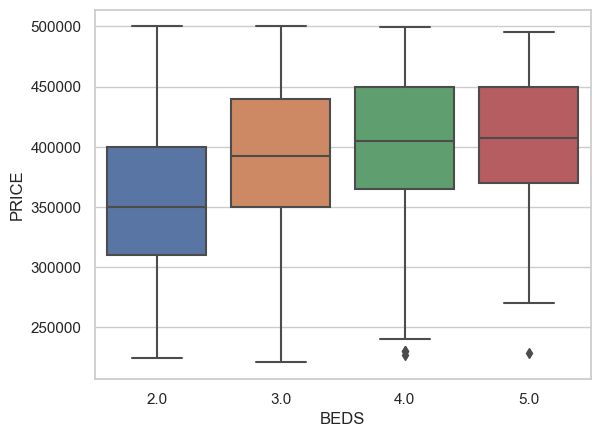

In [1011]:
# view the beds by price to see relationship and identify outliers
sn.set(style = 'whitegrid')
sn.boxplot(x='BEDS',
           y='PRICE',
           data = data)

In [1012]:
#Remove houses with 4+ bedrooms and sold for less than 250,000
dataremove = data[(data['BEDS']>=4) & (data['PRICE']< 250000)].index
data.drop(dataremove,inplace=True)

sn.set(style = 'whitegrid')
sn.boxplot(x='BEDS',
           y='PRICE',
           data = data)

Compare number of bathrooms to price

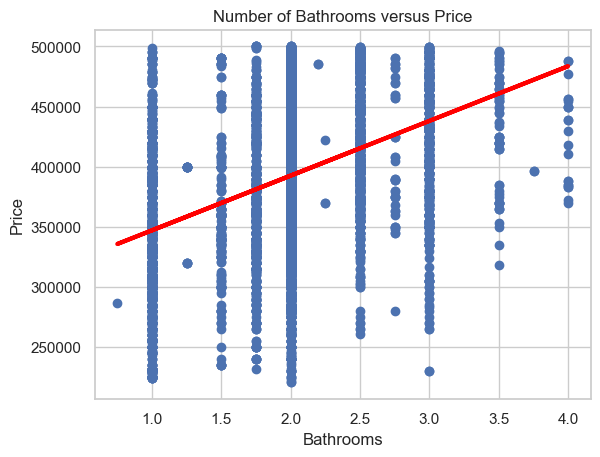

In [1013]:
y=data['PRICE']
x=data['BATHS']
plt.scatter(x,y)
plt.title('Number of Bathrooms versus Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)


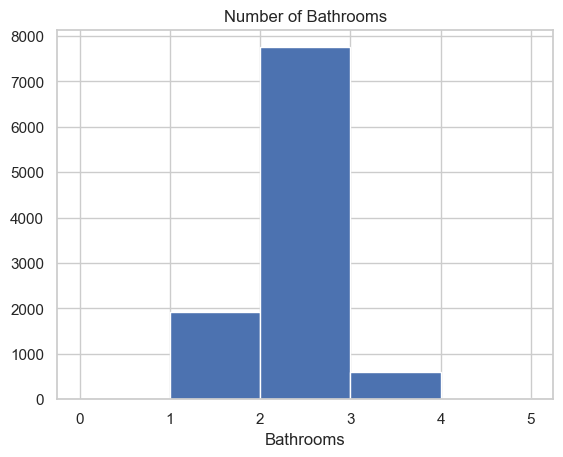

In [1014]:
# view the distribution of bathrooms
plt.hist(data['BATHS'], bins= [0,1,2,3,4,5])
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1df23d820>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1df23dd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1df23d580>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1df24c2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1df24c580>],
 'means': []}

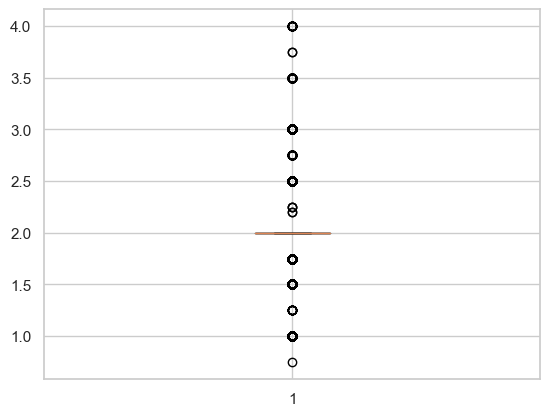

In [1015]:
#identify outliers in the number of bathrooms
plt.boxplot(data['BATHS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1df2a5550>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1df2a5a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1de210520>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1df2a5fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1df2bd2b0>],
 'means': []}

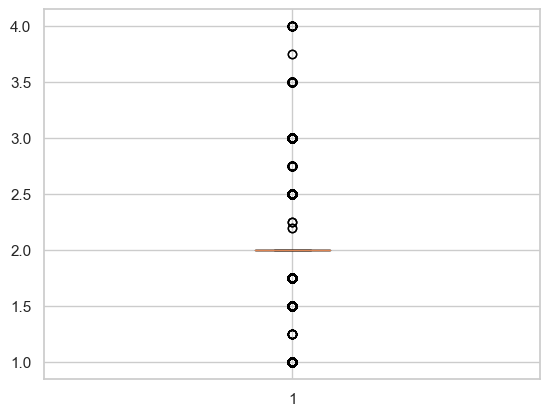

In [1016]:
#remove less than 1 bathroom
data = data[data.BATHS >= 1]
plt.boxplot(data['BATHS'])

<AxesSubplot: xlabel='BATHS', ylabel='PRICE'>

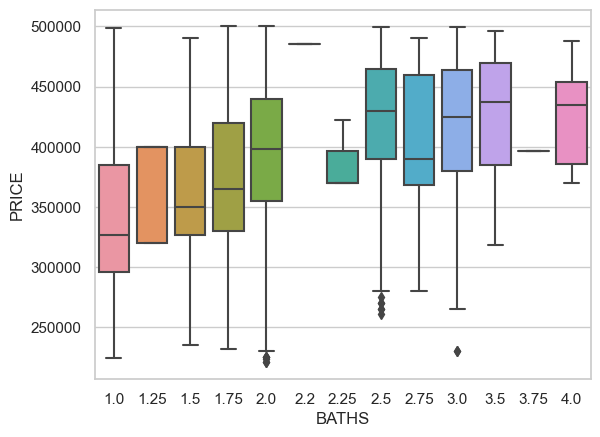

In [1017]:
#view the relationship between bathrooms and price after removing outliers
sn.set(style = 'whitegrid')
sn.boxplot(x='BATHS',
           y='PRICE',
           data = data)

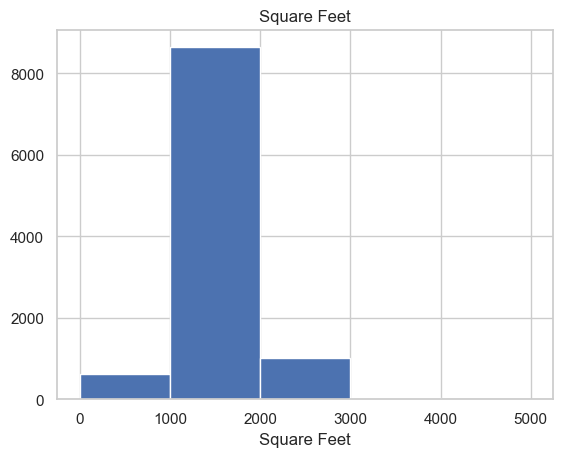

In [1018]:
#view distribution of house square footage
plt.hist(data['SQFT'], bins= [0,1000,2000,3000,4000,5000])
plt.title('Square Feet')
plt.xlabel('Square Feet')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1df6de100>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1df6de640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1df6d0e20>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1df6dea60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1df6ded00>],
 'means': []}

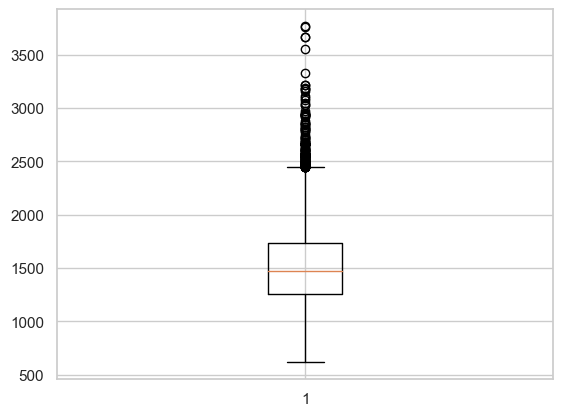

In [1019]:
#view square footage as a boxplot
plt.boxplot(data['SQFT'])

Explore Lot Size

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1df74c580>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1df74cac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1df74c2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1df690e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1df67f850>],
 'means': []}

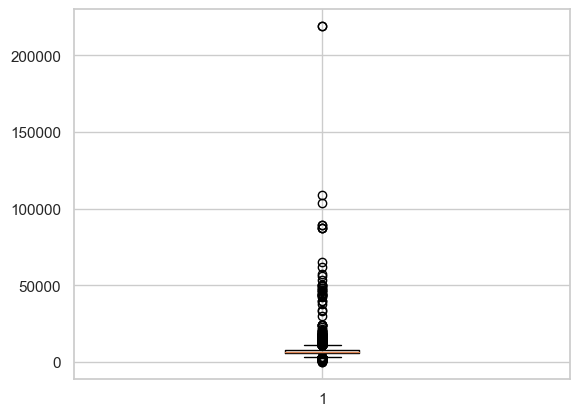

In [1020]:
#view lot size in a boxplot to identify outliers
plt.boxplot(data['LOTSIZE'])

In [1021]:
#Remove greater than 15,000sq ft and less than 3500 as unrealistic for price range
data = data[data.LOTSIZE < 15000]
data = data[data.LOTSIZE > 3500]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1df8f0430>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1df8f0850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1df8f0190>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1df8f0d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1df900070>],
 'means': []}

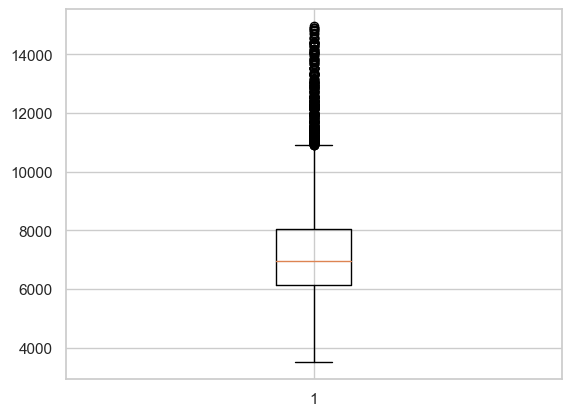

In [1022]:
#view lotsize as a boxplot after removing outliers identified above
plt.boxplot(data['LOTSIZE'])

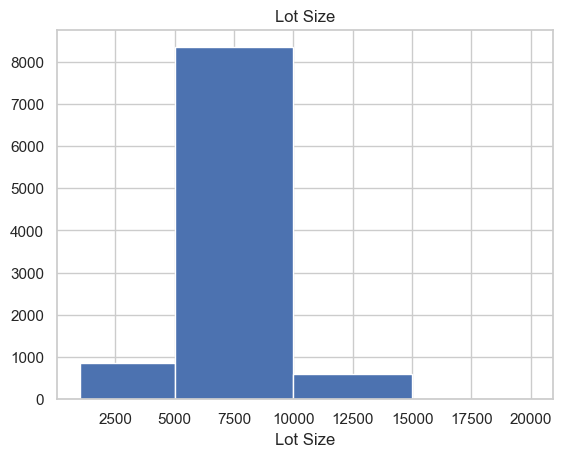

In [1023]:
#view the distribution of houses by lotsize binning at 5000 sq ft intervals
plt.hist(data['LOTSIZE'], bins= [1000,5000,10000,15000,20000])
plt.title('Lot Size')
plt.xlabel('Lot Size')
plt.show()

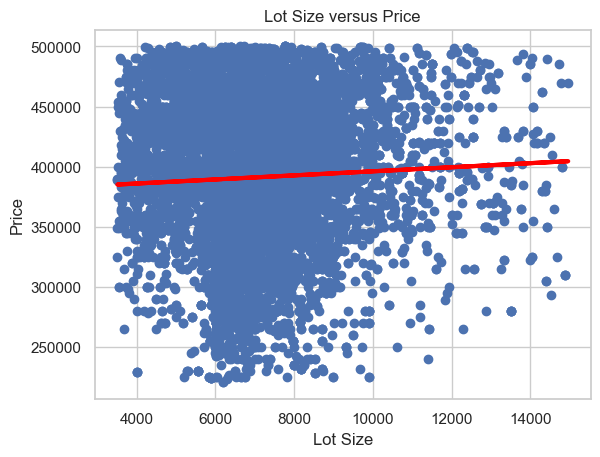

In [1024]:
y=data['PRICE']
x=data['LOTSIZE']
plt.scatter(x,y)
plt.title('Lot Size versus Price')
plt.xlabel('Lot Size')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

Explore Year Built

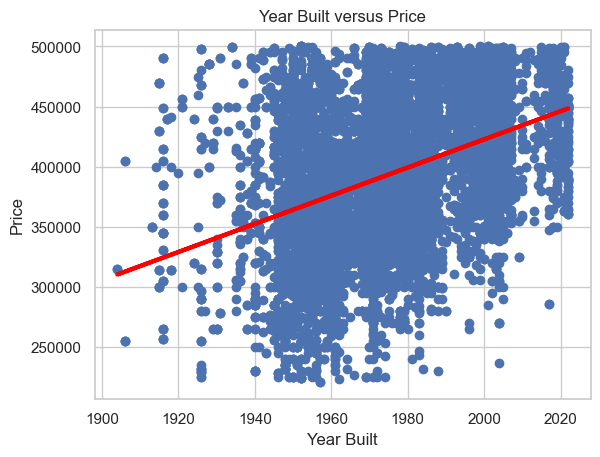

In [1025]:
y=data['PRICE']
x=data['YEARBUILT']
plt.scatter(x,y)
plt.title('Year Built versus Price')
plt.xlabel('Year Built')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1dfaf9f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1dfb09490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1dfaf9c70>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1dfb099d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1dfb09c70>],
 'means': []}

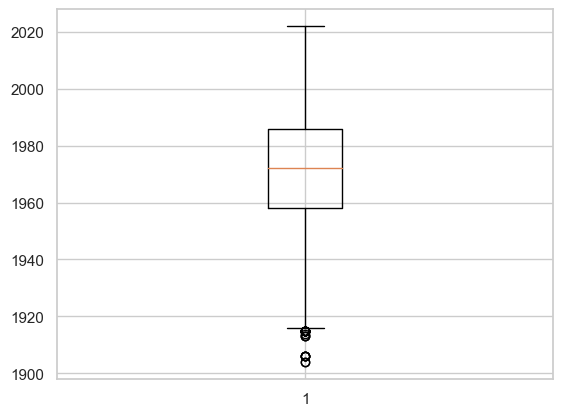

In [1026]:
#view houses by year built to identify outliers
plt.boxplot(data['YEARBUILT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1dfcc3580>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1dfb17190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1dfcc32e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1dfaa4910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1dfcc3880>],
 'means': []}

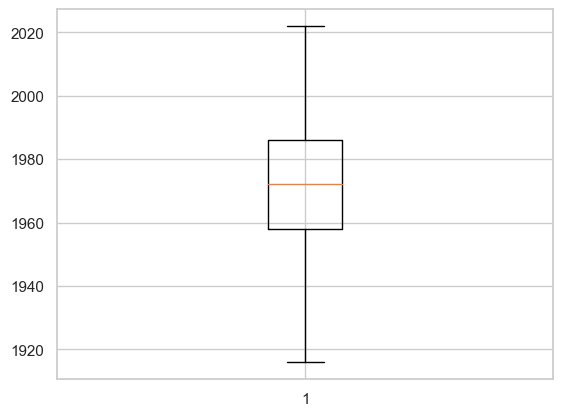

In [1027]:
#Remove anything built before 1915
data = data[data.YEARBUILT > 1915]
plt.boxplot(data['YEARBUILT'])

In [1028]:
#Remove Sold Date, Address, City, State or Provice, MLS#, Latitude and Longitude

model_data = data[['ZIPCODE','PRICE','BEDS','BATHS','SQFT','LOTSIZE','YEARBUILT','POOL','HOA']]


In [1029]:
#view the first five rows of the model data and view the statistical data
model_data.head()
model_data.describe()

,ZIPCODE,PRICE,BEDS,BATHS,SQFT,LOTSIZE,YEARBUILT,POOL,HOA
count,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000
mean,85030.849816,391403.682162,3.232938,1.962725,1510.014508,7163.449734,1973.354107,0.158051,0.219861
std,16.180351,60204.959469,0.654691,0.453272,368.838202,1724.357887,20.187515,0.364807,0.414174
min,85003.000000,220500.000000,2.000000,1.000000,618.000000,3508.000000,1916.000000,0.000000,0.000000
25%,85019.000000,350000.000000,3.000000,2.000000,1256.750000,6125.000000,1958.000000,0.000000,0.000000
50%,85032.000000,395000.000000,3.000000,2.000000,1474.000000,6946.000000,1972.000000,0.000000,0.000000
75%,85041.000000,440000.000000,4.000000,2.000000,1734.000000,8031.250000,1986.000000,0.000000,0.000000
max,85087.000000,499999.000000,5.000000,4.000000,3770.000000,14963.000000,2022.000000,1.000000,1.000000


Heatmap of numerical values

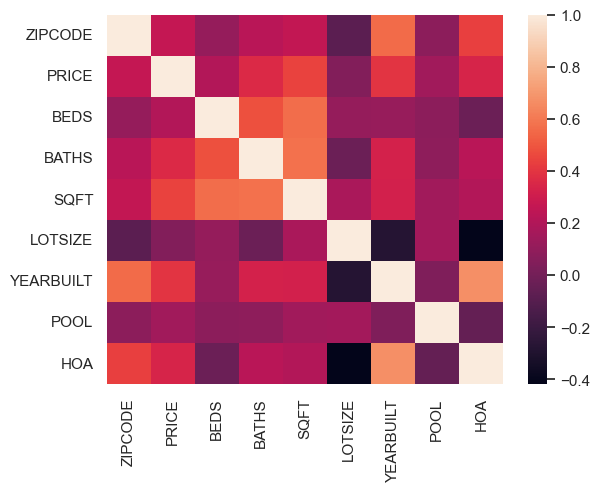

In [1030]:
ax = sn.heatmap(data = model_data.corr())

In [1031]:
#correlation matrix of the model data
corr_matrix = model_data.corr()
corr_matrix['PRICE'].sort_values(ascending=False)


PRICE        1.000000
SQFT         0.444500
YEARBUILT    0.397496
BATHS        0.361879
HOA          0.338139
ZIPCODE      0.262972
BEDS         0.206007
POOL         0.151689
LOTSIZE      0.050020
Name: PRICE, dtype: float64

In [1032]:
#view data types of the model data
model_data.dtypes

ZIPCODE        int64
PRICE        float64
BEDS         float64
BATHS        float64
SQFT           int64
LOTSIZE        int64
YEARBUILT      int64
POOL           int32
HOA            int32
dtype: object

#### Build Models

In [1033]:
#build the datasets removing the dependent variable PRICE from the set of independent variables
X = model_data.drop('PRICE', axis = 1)
y = model_data['PRICE']

In [1034]:
#use one hot encoding on the feature variables

encoder = OneHotEncoder(categories="auto", handle_unknown="ignore",sparse=False)
X=encoder.fit_transform(X)


In [1035]:
#scale the feature variables
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.05544728, -0.02860063,  7.20472818, ...,  2.30804781,
         0.53086999, -0.53086999],
       [-0.05544728, -0.02860063, -0.13879774, ...,  2.30804781,
         0.53086999, -0.53086999],
       [-0.05544728, -0.02860063, -0.13879774, ...,  2.30804781,
         0.53086999, -0.53086999],
       ...,
       [-0.05544728, -0.02860063, -0.13879774, ..., -0.43326659,
        -1.88370038,  1.88370038],
       [-0.05544728, -0.02860063, -0.13879774, ..., -0.43326659,
        -1.88370038,  1.88370038],
       [-0.05544728, -0.02860063, -0.13879774, ..., -0.43326659,
        -1.88370038,  1.88370038]])

In [1036]:
#build the test and train datasets using 80% of the dataset for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

Test various models

models = {}
def train_val_pred(regressor,X_train,y_train,X_test,ytest, index):
    model = regressor
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test,y_pred)

    models[index] = r2

#test various models to determine the model with the highest r^2 score
model_list =[DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,XGBRegressor]

model_names = ['DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']

index = 0
for regressor in model_list:
    train_val_pred(regressor(),X_train,y_train,X_test,y_test,model_names[index])
    index+=1

models

In [1037]:
#Using GridSearchCV found the best parameters for the random forest model
RandFor = RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=300, random_state=4)
RandFor.fit(X_train,y_train)

y_pred = RandFor.predict(X_test)

In [1038]:
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('MSE: ', mean_squared_error(y_test,y_pred))
print('R2: ', r2_score(y_test,y_pred))
print('VarScore: ',explained_variance_score(y_test,y_pred) )
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  20136.20126530149
MSE:  986204738.5211413
R2:  0.7296995053618887
VarScore:  0.730118413636752
RMSE:  31403.896868400603


C:\Users\belbi\AppData\Local\Temp\ipykernel_6664\1357820327.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(residuals)


<AxesSubplot: xlabel='PRICE', ylabel='Density'>

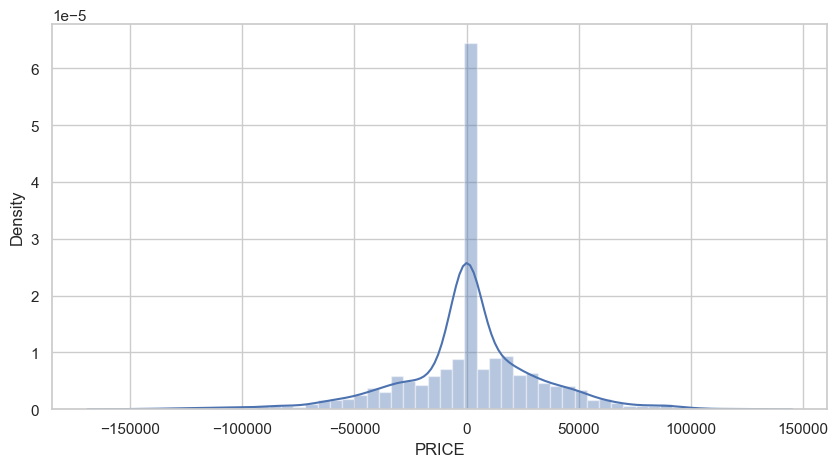

In [1039]:
fig=plt.figure(figsize=(10,5))
residuals = (y_test - y_pred)
sn.distplot(residuals)

Artifical Neural Network Model test

Tested a neural network to determine if neural network model produced a more accurate model. The results
were less than the random forest model therefore the random forest model was selected.

In [1040]:
#Code used to build ANN model to determine if more accurate than Random Forest
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation, Dropout
#from tensorflow.keras.optimizers import Adam

#model = Sequential()
#model.add(Dense(18,activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(36,activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(36,activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1))
#model.compile(optimizer = 'Adam', loss = 'mae', metrics =['mse','mae','accuracy'])

In [1041]:
#history = model.fit(x=X_train, y=y_train,validation_data = (X_test,y_test),
#          batch_size = 20, epochs = 150, verbose = 2)


In [1042]:
#y_pred = model.predict(X_test)
#print('MAE: ', mean_absolute_error(y_test,y_pred))
#print('MSE: ', mean_squared_error(y_test,y_pred))
#print('VarScore: ',explained_variance_score(y_test,y_pred) )

In [1048]:
#change working directory
os.chdir(r"C:\Users\belbi\PycharmProject\Capstone")

In [1050]:
## to test the model

testdata =pd.read_excel(r'C:\Users\belbi\PycharmProject\Capstone\testdata.xlsx',sheet_name='Sheet1')
datatest = encoder.transform(testdata)

In [1051]:
datatest = encoder.transform(testdata)
datatest = scaler.transform(datatest)
prediction = RandFor.predict(datatest)
prediction

array([411074.33      , 422146.5       , 440055.76666667])

Save trained model

In [1052]:
# pickle file to be used share model data with python pages used for Streamlit app

model = {"model": RandFor}
with open('trained_model.pkl','wb') as file:
    pickle.dump(model,file)


In [1053]:
with open('trained_model.pkl','rb')as file:
    model = pickle.load(file)

In [1054]:
# pickle file to be used to share encoder with python pages used for Streamlit app

with open('encoder.pkl' ,'wb') as f:
    pickle.dump(encoder,f)

In [1055]:
with open('encoder.pkl','rb') as f:
    encoder = pickle.load(f)

In [1056]:
# pickle file to be used to share standard scaler with python pages used for Streamlit app

with open('scaler.pkl' ,'wb') as f:
    pickle.dump(scaler,f)

In [1057]:
with open('scaler.pkl','rb') as f:
    scaler=pickle.load(f)

In [1058]:
#convert zipcode to integer and round price to nearest dollar
data['ZIPCODE'] = data['ZIPCODE'].apply(np.int64)

In [1059]:
# pickle file to be used to share data with python pages used for Streamlit app

with open('data.pkl','wb') as f:
    pickle.dump(data,f)

In [1060]:
# pickle file to be used to share data with python pages used for Streamlit app

with open('data.pkl','wb') as f:
    pickle.dump(data,f)

In [1061]:
with open('data.pkl','rb') as f:
    data=pickle.load(f)

In [1062]:
data.dtypes

SOLDDATE             datetime64[ns]
ADDRESS                      object
CITY                         object
STATE OR PROVINCE            object
ZIPCODE                       int64
PRICE                       float64
BEDS                        float64
BATHS                       float64
SQFT                          int64
LOTSIZE                       int64
YEARBUILT                     int64
MLS#                        float64
POOL                          int32
HOA                           int32
LATITUDE                    float64
LONGITUDE                   float64
BATH                          int32
dtype: object

In [1063]:
datatest = data.groupby(['ZIPCODE','POOL']).median('PRICE')
datatest


PRICE  BEDS  BATHS    SQFT  LOTSIZE  YEARBUILT       MLS#  \
ZIPCODE POOL                                                                 
85003   0     355000.0   3.0   1.50  1124.0   6500.0     1926.0  6349106.5   
85004   0     363300.0   3.0   2.00  1139.0   6333.0     2021.0  6370631.0   
        1     363300.0   3.0   2.00  1139.0   6218.0     2021.0  6370631.0   
85006   0     400000.0   3.0   1.75  1165.0   6704.0     1940.0  6362993.0   
        1     381500.0   2.0   1.50  1227.5   7146.5     1940.0  6436602.0   
...                ...   ...    ...     ...      ...        ...        ...   
85085   1     467500.0   3.0   2.00  1594.5   5478.0     2003.5  6311062.0   
85086   0     465000.0   3.0   2.00  1590.0   5534.0     2004.0  6354904.5   
        1     465000.0   3.0   2.25  1604.5   5581.5     2003.0  6334708.0   
85087   0     485000.0   4.0   2.50  2160.0   5850.0     2006.0  6308348.0   
        1     490000.0   4.0   3.00  2546.0   5196.0     2006.0  6308348.0   

              HOA   LATITUDE   LONGITUDE  BATH  
ZIPCODE POOL                                    
85003   0     0.0  33.438167 -112.079634   3.0  
85004   0     0.0  33.431545 -112.066942   3.0  
        1     0.0  33.432453 -112.066011   3.0  
85006   0     0.0  33.467140 -112.049290   3.0  
        1     0.0  33.463794 -112.046799   2.0  
...           ...        ...         ...   ...  
85085   1     1.0  33.739801 -112.111130   3.0  
85086   0     1.0  33.851775 -112.128793   3.0  
        1     1.0  33.847713 -112.117246   3.0  
85087   0     1.0  33.878037 -112.153663   4.0  
        1     1.0  33.872793 -112.152685   4.0  

[83 rows x 11 columns]

In [1064]:
datatest = data.groupby(['ZIPCODE','POOL']).median('PRICE')
datatest


PRICE  BEDS  BATHS    SQFT  LOTSIZE  YEARBUILT       MLS#  \
ZIPCODE POOL                                                                 
85003   0     355000.0   3.0   1.50  1124.0   6500.0     1926.0  6349106.5   
85004   0     363300.0   3.0   2.00  1139.0   6333.0     2021.0  6370631.0   
        1     363300.0   3.0   2.00  1139.0   6218.0     2021.0  6370631.0   
85006   0     400000.0   3.0   1.75  1165.0   6704.0     1940.0  6362993.0   
        1     381500.0   2.0   1.50  1227.5   7146.5     1940.0  6436602.0   
...                ...   ...    ...     ...      ...        ...        ...   
85085   1     467500.0   3.0   2.00  1594.5   5478.0     2003.5  6311062.0   
85086   0     465000.0   3.0   2.00  1590.0   5534.0     2004.0  6354904.5   
        1     465000.0   3.0   2.25  1604.5   5581.5     2003.0  6334708.0   
85087   0     485000.0   4.0   2.50  2160.0   5850.0     2006.0  6308348.0   
        1     490000.0   4.0   3.00  2546.0   5196.0     2006.0  6308348.0   

              HOA   LATITUDE   LONGITUDE  BATH  
ZIPCODE POOL                                    
85003   0     0.0  33.438167 -112.079634   3.0  
85004   0     0.0  33.431545 -112.066942   3.0  
        1     0.0  33.432453 -112.066011   3.0  
85006   0     0.0  33.467140 -112.049290   3.0  
        1     0.0  33.463794 -112.046799   2.0  
...           ...        ...         ...   ...  
85085   1     1.0  33.739801 -112.111130   3.0  
85086   0     1.0  33.851775 -112.128793   3.0  
        1     1.0  33.847713 -112.117246   3.0  
85087   0     1.0  33.878037 -112.153663   4.0  
        1     1.0  33.872793 -112.152685   4.0  

[83 rows x 11 columns]